## Why Do Some Songs Become Popular?

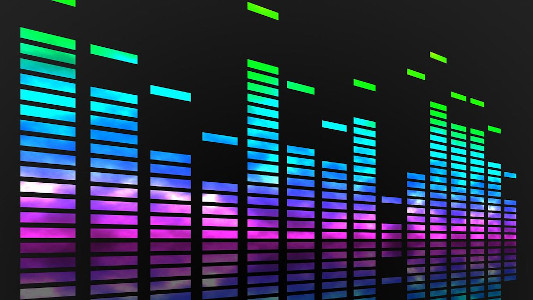

- [Introduction](#0)
- [Feature explanations](#1)
- [Import Libraries](#2)
- [Data Preparation and Analysis](#3)
    * [Cleaning the data](#3a)
    * [Analysis](#3b)
    * [Feature Engineering](#3c)
- [Models](#4a)
    * [Logistic Regression](#4)
    * [Ridge and Lasso Regression](#5)
    * [KNN Algorithm](#6)
    * [SVM](#7)
    * [Naive Bayes](#8)
    * [Decision Tree Classifier](#9)
    * [Random Forest Classifier](#10)
    * [Feature Importance](#11)
    * [Comparison Of Performance](#12)
    * [Conclusion](#13)


<a id="0"></a> <br>

> ## Introduction
- Currently, being able to predict that something might be popular beforehand is an important research subject for every industry. It also has recently became a very important subject for the growing and competitive music industry as well. Since wide use of digital music platforms (Spotify, Billboard, Lastfm), data can be easily reached and the listening behaviors of the listeners can be easily observed. This provides convenience in forecasting techniques and it is also frequently used in recommendation systems.

# <a id="1"></a> <br>
> ## Feature Explanations
- Dataset contains 19.000 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on .
- duration_ms: The duration of the track in milliseconds.
- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- audio_mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. 
- instrumentalness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
- audio_valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- song_popularity: Song ratings of spotify audience.
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

<a id="2"></a> 
## Import Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings("ignore")

 <a id="3"></a> 
 ## Data Preparation and Analysis

In [ ]:
#load the data
spotify_song_data= pd.read_csv("../input/19000-spotify-songs/song_data.csv")
spotify_song_info= pd.read_csv("../input/19000-spotify-songs/song_info.csv") 

In [ ]:
song_info=spotify_song_info.copy()

In [ ]:
song_data=spotify_song_data.copy()
song_data.head(3)

In [ ]:
song_data.shape

 <a id="3a"></a> 
## Cleaning Data

In [ ]:
song_data.columns[song_data.isnull().any()]

In [ ]:
song_data.isnull().sum()

 <a id="3b"></a> 
## Analysis

In [ ]:
song_data.info()

In [ ]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

In [ ]:
song_data.describe()

In [ ]:
song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

- Checked popularity rating of songs that have been popular in the last 10 years in Spotify and took the mean value of them (66.5) . According to this value, the songs has above this rating could remain on the top lists for a long time. If song_popularity is higher than 66.5 (this is about 30% percent of data) we labeled it "1" and if is not we labeled it "0". So we have "1" for the popular songs and "0" for the unpopular ones.

In [ ]:
#popular songs' data
a=song_data[song_data["popularity"]==1]
a.describe()

In [ ]:
song_data.corr()

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

- Correlation between loudness and energy is 0.8 which is strong and correlation between loudness and accusticness is 0.6 which is moderate. Except two of them all the correlations are quite low. When we compare the correlation between song_popularity and all other features, we don't see a strong correlation (a linear relationship) that gives us a clear information about popularity. Accusticness,danceability and loudness seems to have correlation with popularity feature(0.10) and istrumentalness has 0.20.

## Categorical Variable Analysis

In [ ]:
def bar_plot(variable):
    
    var=song_data[variable]
    var_value= var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="orange")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))


In [ ]:
category1 = ["popularity","key","audio_mode","time_signature"]
for c in category1:
    bar_plot(c)

## Basic Data Analysis

In [ ]:
# key vs popularity
song_data[["key","popularity"]].groupby(["key"], as_index = False).mean().sort_values(by="popularity",ascending = False)

In [ ]:
# audio_mode vs popularity
song_data[["audio_mode","popularity"]].groupby(["audio_mode"], as_index = False).mean().sort_values(by="popularity",ascending = False)

In [ ]:
# time_signature vs popularity
song_data[["time_signature","popularity"]].groupby(["time_signature"], as_index = False).mean().sort_values(by="popularity",ascending = False)

In [ ]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [ ]:
song_data.loc[detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"])]

In [ ]:
# drop outliers
song_data = song_data.drop(detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"]),axis = 0).reset_index(drop = True)

In [ ]:
song_data[song_data["audio_mode"].isnull()]

In [ ]:
g = sns.factorplot(x = "key", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

In [ ]:
g = sns.factorplot(x = "audio_mode", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

In [ ]:
g = sns.factorplot(x = "time_signature", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

In [ ]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "acousticness")
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "danceability",color="purple")
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "instrumentalness",color="green")
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "loudness",color="orange")
g.add_legend()
plt.show()

> ## Features Distribution


In [ ]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( song_data["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( song_data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( song_data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( song_data["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( song_data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( song_data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( song_data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( song_data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

In [ ]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "acousticness", bins = 25)
plt.show()

In [ ]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "danceability", bins = 25)
plt.show()

In [ ]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "loudness", bins = 25)
plt.show()

In [ ]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "instrumentalness", bins = 25)
plt.show()

- Data distribution of songs display today's songs features like dancebility, energy, loudness and tempo are quite high. People like fast and loud music.
- According to instrumentalness, liveness and speechness, most of the songs are not live performances and they have lyrics.
- Keys like 0,1,5,6 and 11 seems more effective in songs. And if key== 0 or 1 or 6 song has more chance to be populer.
- Time_signure is mostly 4 and 5 in both populer and general data.
- If danceability>0.6 song has more chance to be popular.
- If loudness > -10 song has more chance to be popular.


> ## People like Happy Songs or Sad Songs?
- As we see in the feature explanations, audio valance describes the musical positiveness conveyed by a track (like sad or happiness - between 0 to 1). We supposed our threshold is 0.5.
- With this threshold we have happy songs more in the general data and the numbers are pretty close in the popular songs, but when we looked at top 500, we can say that negative songs are twice as much as positives.

**All Songs**

In [ ]:
song_data3=song_data.copy()
song_data3["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data.audio_valence ]
song_data3["song_audio_valence"].value_counts()

**Populer Songs**

In [ ]:
song_data1=song_data3[song_data3["song_popularity"]>66.5]
song_data1["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data1.audio_valence ]
song_data1["song_audio_valence"].value_counts()

**Top 500**

In [ ]:
song_data2_new=song_data1[song_data1["song_popularity"]>90]
song_data2_new["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data2_new.audio_valence ]
song_data2_new["song_audio_valence"].value_counts()

In [ ]:
song_data2= song_data2_new[song_data2_new.popularity==1]
a=song_data2.iloc[:,1]
a.to_numpy()
b=song_data2.iloc[:,14]
b.to_numpy()
plt.figure(figsize=[8,8])
markerline, stemlines, baseline = plt.stem(
    a, b, linefmt='grey', markerfmt='D', bottom=0.5)
markerline.set_markerfacecolor('none')
plt.xlabel("Popularity")
plt.ylabel("Audio Valance")
plt.show()

In [ ]:
new_data = pd.concat([song_info, song_data1],axis=1)
new_data=new_data[new_data["song_popularity"]>90]

In [ ]:
# Top 500 Playlists Gender
plt.figure(figsize=(12,5))
new_data= song_info['playlist'].head(500)
g = sns.countplot(new_data, palette="icefire")
plt.title("Top 500 Genres")
plt.show()

- 60's and 70's rock music seems more popular in this data.

 <a id="3c"></a> 
## Feature Engineering

In [ ]:
spotify_song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in spotify_song_data.song_popularity ]
spotify_song_data["popularity"].value_counts()

In [ ]:
data_plr = pd.concat([spotify_song_data.popularity,spotify_song_data.song_name],axis=1)
data_plr.head()

In [ ]:
song_data['song_name'].value_counts(dropna=False)
song_data['song_name'].dropna(inplace=True)

In [ ]:
import re
import nltk 
import nltk as nlp

nltk.download("stopwords") 
from nltk.corpus import stopwords

In [ ]:
Song_Name = [ word for word in spotify_song_data.song_name if not word in set(stopwords.words("english"))]
lemma = nlp.WordNetLemmatizer()
Song_Name = [ lemma.lemmatize(word) for word in Song_Name] 

In [ ]:
Song_Name_list = []
for Song_Name in data_plr.song_name:
    Song_Name = re.sub("[^a-zA-Z]"," ",Song_Name)
    Song_Name = Song_Name.lower() 
    Song_Name = nltk.word_tokenize(Song_Name)
    lemma = nlp.WordNetLemmatizer()
    Song_Name = [ lemma.lemmatize(word) for word in Song_Name]
    Song_Name = " ".join(Song_Name)
    Song_Name_list.append(Song_Name)

In [ ]:
# %% bag of words
from sklearn.feature_extraction.text import CountVectorizer
max_features = 10
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(Song_Name_list).toarray()  
print("en sik kullanilan {} kelimeler: {}".format(max_features,count_vectorizer.get_feature_names()))

In [ ]:
 a = count_vectorizer.get_feature_names()

In [ ]:
df=pd.DataFrame(Song_Name_list,columns=['Names'])

In [ ]:
artist= song_info.artist_name.tolist()
name_count = Counter(artist)         
most_common_names2 = name_count.most_common(10) 
most_common_names2


**SENTIMENTAL ANALYSIS**

In [ ]:
from textblob import TextBlob
data_plr['sentiment'] = data_plr['song_name'].map(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
data_plr.head()

In [ ]:
import numpy as np
cut = pd.cut(
    data_plr['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
data_plr['polarity'] = cut.values
data_plr[['polarity','sentiment']].head()

In [ ]:
plt.figure(figsize=(5,5))
data= data_plr.polarity
g = sns.countplot(data, palette="Set3")
plt.title("Songs' Polarity")
plt.show()

In [ ]:
song_data =pd.concat([song_data,data_plr.sentiment],axis=1)
song_data.head(3)

In [ ]:
song_data["key"] = song_data["key"].astype("category")
song_data = pd.get_dummies(song_data, columns=["key"])
song_data.head()

In [ ]:
song_data["audio_mode"] = song_data["audio_mode"].astype("category")
song_data = pd.get_dummies(song_data, columns=["audio_mode"])
song_data.head()

In [ ]:
song_data["time_signature"] = song_data["time_signature"].astype("category")
song_data = pd.get_dummies(song_data, columns=["time_signature"])
song_data.head()

<a id="4a"></a> <br>
## Models

In [ ]:
song_data.drop(["song_popularity","song_name"],axis=1,inplace=True)

In [ ]:
song_data.columns[song_data.isnull().any()]

In [ ]:
#fill nan values
song_data['song_duration_ms'] = song_data['song_duration_ms'].fillna(np.mean(song_data['song_duration_ms']))
song_data['acousticness'] = song_data['acousticness'].fillna(np.mean(song_data['acousticness']))
song_data['danceability'] = song_data['danceability'].fillna(np.mean(song_data['danceability']))
song_data['energy'] = song_data['energy'].fillna(np.mean(song_data['energy']))
song_data['instrumentalness'] = song_data['instrumentalness'].fillna(np.mean(song_data['instrumentalness']))
song_data['liveness'] = song_data['liveness'].fillna(np.mean(song_data['liveness']))
song_data['loudness'] = song_data['loudness'].fillna(np.mean(song_data['loudness']))
song_data['speechiness'] = song_data['speechiness'].fillna(np.mean(song_data['speechiness']))
song_data['tempo'] = song_data['tempo'].fillna(np.mean(song_data['tempo']))
song_data['audio_valence'] = song_data['audio_valence'].fillna(np.mean(song_data['audio_valence']))
song_data['popularity'] = song_data['popularity'].fillna(np.mean(song_data['popularity']))

In [ ]:
song_data.columns[song_data.isnull().any()]

In [ ]:
def change_type(var):
    song_data[var] = song_data[var].astype(int)

In [ ]:
column= ["sentiment","key_0.0","key_1.0","key_2.0","key_3.0","key_4.0","key_5.0","key_6.0","key_7.0","key_8.0","key_9.0","key_10.0","key_11.0","audio_mode_0.0","audio_mode_1.0","time_signature_0.0","time_signature_1.0","time_signature_3.0","time_signature_4.0","time_signature_5.0"]
for i in column:
    change_type(i)

In [ ]:
#data preparation
y = song_data["popularity"].values
x_data=song_data.drop(["popularity"],axis=1)
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

<a id="4"></a> <br>
**Logistic Regression**

- LR is one of the basic classiﬁcation method is used prediction of categorical variables.Our problem has two possible outputs popular(1) and unpopular(0) which is suitable for binary logistic regression. Since it is a probability value that we want to get from the problem, we obtained a value between [0,1] using the sigmoid function.  
α(z) = 1/(1+e-z)
- Binary cross entropy is used for the loss function and gradient descent for the update the parameters.

In [ ]:
# parameter initialize and sigmoid function
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [ ]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [ ]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    #update
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate =0.01, num_iterations = 200)

**ROC Curve with Logistic Regression**

In [ ]:
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
y=y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

In [ ]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(logreg,x_train,y_train,cv=k)
cross_val_log=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

In [ ]:
#GridSearchCV with Logreg
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))
##numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)

In [ ]:
Logistic_score=logreg_cv.best_score_
CrossVal_Logistic_score=cross_val_log

<a id="5"></a> <br>
**Ridge and Lasso Regression**

In [ ]:
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
#print('Ridge score: ',ridge.score(x_test,y_test))
print("Test accuracy:",root_mean_squared_error(y_test,ridge_predict))

In [ ]:
Ridge_score= root_mean_squared_error(y_test,ridge_predict)

In [ ]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(song_data.loc[:,['danceability','energy','audio_valence','tempo','song_duration_ms','acousticness','instrumentalness','key','liveness','loudness','audio_mode','speechiness']])
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
lasso_predict = lasso.predict(x_test)
print('Lasso coefficients: ',lasso.coef_)
print("Test accuracy:",root_mean_squared_error(y_test,lasso_predict))

In [ ]:
Lasso_Score=root_mean_squared_error(y_test,lasso_predict)

In [ ]:
x= ['song_duration_ms', 'acousticness', 'danceability',
     'energy', 'instrumentalness', 'key', 'liveness',
     'loudness', 'audio_mode', 'speechiness', 'tempo', 
     'time_signature', 'audio_valence']
y= ['popularity']

In [ ]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.metrics as metrics

def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(x_train, 
                                                         y_train).predict(x_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(x_train, 
                                                          y_train).predict(x_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [ ]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}
test(models,song_data)

In [ ]:
test(models,song_data)

<a id="6"></a> <br>
**KNN Algorithm**

In [ ]:
# KNN prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
y=y.astype(int)
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

In [ ]:
#KNN Test
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=3) test accuracy is: ',knn.score(x_test,y_test))

In [ ]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(knn,x_train,y_train,cv=k)  
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x,y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

In [ ]:
KKN_Score= max(test_accuracy)
CrossVal_KKN_Score=cv_result_knn

<a id="7"></a> <br>
**SVM**

- SVM is an effective and simple method mostly used in classification problems. The aim of the SVM algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points. C and Gamma are the parameters for a nonlinear support vector machine (SVM) with a Gaussian radial basis function kernel.

In [ ]:
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(x_train,y_train)
print("Train accuracy of svm algo:",svm.score(x_train,y_train))
print("Test accuracy of svm algo:",svm.score(x_test,y_test))

In [ ]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(svm,x_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

In [ ]:
SVM_score= svm.score(x_test,y_test)
CrossVal_SVM_score=cv_result_svm

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
cv = GridSearchCV(pipeline,param_grid=parameters,cv=10)
cv.fit(x_train,y_train)
y_pred = cv.predict(x_test)

print("Tuned Model Parameters: {}".format(cv.best_params_))
print("Test accuracy: {}".format(cv.score(x_test, y_test)))

<a id="8"></a> <br>
**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
print("Train accuracy of naive bayes:",nb.score(x_train,y_train))
print("Test accuracy of naive bayes:",nb.score(x_test,y_test))


In [ ]:
Naive_bayes_score=nb.score(x_test,y_test)

<a id="9"></a> <br>
**Decision Tree Classifier**

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
DecisionTree_score=dt.score(x_test,y_test)
print("Train ccuracy of decision tree:",dt.score(x_train,y_train))
print("Test accuracy of decision tree:",dt.score(x_test,y_test))

In [ ]:
from sklearn.model_selection import cross_val_score
k =10
cv_result = cross_val_score(dt,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

> <a id="10"></a> <br>
**Random Forest Classifier**
- RF is one of the most popular ensemble learning method in machine learning not only gives good results even without hyperparameter optimization but also can use both classification and regression problems. But the common problem of the traditional decision trees is over-fitting. In order to avoid overfitting, random forest models select and train hundreds of different sub-samples (multiple deep decision trees) randomly and reduce the variance. We used 100 estimators and random state 3 gave the about % 89 accuracy. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state = 3)
rf.fit(x_train,y_train)
print("Train ccuracy of random forest",rf.score(x_train,y_train))
print("Test accuracy of random forest",rf.score(x_test,y_test))
RandomForestClassifier_score=rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
t_true=y_test

In [ ]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(rf,x_train,y_train,cv=k) # uses R^2 as score 
cv_result_randomforest=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

In [ ]:
CrossVal_RandomForestClassifier_score=cv_result_randomforest

**Confusion Matrix with Random Forest**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

In [ ]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

- Since we set our threshold such that 70% of the songs in our dataset are named as not popular and 30% are named as popular, 70% accuracy can be achieved by predicting all 0s. In order to capture this, we should consider the precision and recall values. As we see in confusion matrix, model predicted “695 popular” songs and “2596 unpopular” songs correct.


In [ ]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Random Forest', rf), ('Logistic Regression', logreg)], 
                       voting='soft', weights=[2,1]).fit(x_train,y_train)
print('The train accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_train,y_train))
print('The test accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_test,y_test))

In [ ]:
from sklearn.model_selection import cross_val_score
k = 5
cv_result = cross_val_score(ensemble,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

<a id="11"></a> <br>
## FEATURE IMPORTANCE

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#pyplot.show()

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(x_train, y_train)

# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 7)
#plot_importance(model)
pyplot.show()

In [ ]:
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

thresholds = sort(model.feature_importances_) # Fit model using each importance as a threshold

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True) # if prefit=True, you should call transform directly.
    select_X_train = selection.transform(x_train)
    # train model 
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # evaluate model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

<a id="12"></a> <br>
## Comparison Of Performance

In [ ]:
model_performances=pd.DataFrame({'Model':['RandomForestClassifier','SVM','DesicionTreeClassifier','K-NearestNeighbors','LogisticRegession','NaiveBayes','Ridge','Lasso'],
                                 'Accuracy':[RandomForestClassifier_score,SVM_score,DecisionTree_score,KKN_Score,Logistic_score,Naive_bayes_score,Ridge_score,Lasso_Score]})
model_performances.sort_values(by = "Accuracy",ascending=False)

In [ ]:
model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['Accuracy'].sort_values(ascending=False))
f,ax = plt.subplots(figsize = (4,6))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test Accuracies', ylabel='Models')
plt.show()


In [ ]:
labels = ['RF','SVM', 'K-NN', 'LR']
accuracy = [0.897531,0.885054, 0.789488,0.710711]
validation = [0.878750, 0.875631, 0.714693, 0.710711]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))
rects1 = ax.bar(x - width/2,accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, validation, width, label='Validation')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

<a id="13"></a> <br>
## Conclusion

First we tried to predict popular songs using audio features then we added song name texts’ polarity to it and tried to improve our model. We also fitted the model using each importance as a threshold. Although accusticness is the most important of these features did not lead us to a strong result.  
We had 18835 songs available. Decision Tree algorithms which mainly given better results when we don’t have so much data got the best result with RF. There were no strong linear correlations in our data, so linear methods did not fit well. In LR, We built the model using the gradient decent and this gave the best result in 200 iterations which was a moderate result. As in many popularity studies, we achieved the second best result with SVM. Adding Polarity to features value has almost not changed the result at all .
For the future work, the following questions can be asked. Nowadays, the industrialization of popular music has became more common all over the world and most musicians are using computers when they create their songs. So are songs started to be more similar and less unique? Does these affect our predictions in a positive way? With industrialization, prediction of the popular and trendy items are getting easier? Could the prediction increase if we had data with all the songs are created by a computer?